# Recommendation E-commerce (store)

In [1]:
# Import the packages

In [2]:
pip install  cluster

In [3]:
pip install scikit-learn

In [4]:
pip install kmeans

  Preparing metadata (setup.py) ... done
  Created wheel for kmeans: filename=kmeans-1.0.2-cp311-cp311-linux_x86_64.whl size=12528 sha256=eada8442acc2b0d4bd75276935cdc12b3ffd76a7e9836c9479c78228cf0e6339
  Stored in directory: /root/.cache/pip/wheels/46/73/c1/99a115afb9caa9d3fa04a35509d96d075f18944cbf2b7bdf9b
Successfully built kmeans


In [5]:
import pandas as pd            # FOR FILE READ
import numpy as np             # FOR MATH FUNCTION
import seaborn as sns          # graphic plot
import matplotlib.pyplot as plt #  plot
import plotly.express as px      # plot viewer
import pickle



#model
from sklearn.cluster import KMeans
from mlxtend.preprocessing import transactionencoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

read the file

In [6]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/online_retail.csv")

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
data.shape

(541909, 8)

In [12]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [13]:
data[data['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2022-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2022-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2022-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2022-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2023-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2023-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2023-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2023-12-08 10:33:00,0.0,NaN,United Kingdom


In [14]:
data[data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2022-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2022-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2022-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2022-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2022-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2023-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2023-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2023-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2023-12-09 10:26:00,10.79,NaN,United Kingdom


# Drop rows where any of the specified columns have NaN

In [15]:
data_nu= ['InvoiceNo', 'StockCode', 'Description', 'Quantity',
                 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

data.dropna(subset=data_nu, inplace=True)


In [16]:
print(data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2023-07-10 16:30:57.879207168,3.460471,15287.690570
min,-80995.000000,2022-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2023-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2023-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2023-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2023-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


# select the reqired information

In [20]:
data[['Description','InvoiceDate','CustomerID','UnitPrice']]

,Description,InvoiceDate,CustomerID,UnitPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,2022-12-01 08:26:00,17850.0,2.55
1,WHITE METAL LANTERN,2022-12-01 08:26:00,17850.0,3.39
2,CREAM CUPID HEARTS COAT HANGER,2022-12-01 08:26:00,17850.0,2.75
3,KNITTED UNION FLAG HOT WATER BOTTLE,2022-12-01 08:26:00,17850.0,3.39
4,RED WOOLLY HOTTIE WHITE HEART.,2022-12-01 08:26:00,17850.0,3.39
...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,2023-12-09 12:50:00,12680.0,0.85
541905,CHILDREN'S APRON DOLLY GIRL,2023-12-09 12:50:00,12680.0,2.10
541906,CHILDRENS CUTLERY DOLLY GIRL,2023-12-09 12:50:00,12680.0,4.15
541907,CHILDRENS CUTLERY CIRCUS PARADE,2023-12-09 12:50:00,12680.0,4.15


# total amount and create a new columns

In [21]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

In [22]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [23]:
data['InvoiceNo'].nunique()

22190

In [24]:
data['Description'].nunique()

3896

In [25]:
data['CustomerID'].nunique()

4372

In [26]:
data['InvoiceDate'].nunique()

20460

***To perform this comparison, we must focus on the Customer ID, along with the products they purchased, the purchase date, and the Invoice number. The key focus should be on Customer ID and Product Description***

# customer and there prodect in date

In [27]:
selected=data[['InvoiceNo','Description','InvoiceDate','CustomerID','TotalAmount']]

In [28]:
selected['InvoiceDate'].min()

Timestamp('2022-12-01 08:26:00')

In [29]:
ref_date=selected['InvoiceDate'].max()
ref_date

Timestamp('2023-12-09 12:50:00')

In [30]:
selected=selected.sort_values('InvoiceDate')

In [31]:
selected

,InvoiceNo,Description,InvoiceDate,CustomerID,TotalAmount
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,2022-12-01 08:26:00,17850.0,15.30
1,536365,WHITE METAL LANTERN,2022-12-01 08:26:00,17850.0,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,2022-12-01 08:26:00,17850.0,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,2022-12-01 08:26:00,17850.0,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,2022-12-01 08:26:00,17850.0,20.34
...,...,...,...,...,...
541896,581587,PLASTERS IN TIN STRONGMAN,2023-12-09 12:50:00,12680.0,19.80
541895,581587,PLASTERS IN TIN CIRCUS PARADE,2023-12-09 12:50:00,12680.0,19.80
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,2023-12-09 12:50:00,12680.0,16.60
541900,581587,ALARM CLOCK BAKELIKE IVORY,2023-12-09 12:50:00,12680.0,15.00


In [32]:
rfm=selected.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
}).reset_index()

# RFM

In [33]:
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [34]:
rfm.skew()  # rfm distripution

,0
CustomerID,0.000918
Recency,1.249665
Frequency,11.412274
Monetary,21.705287


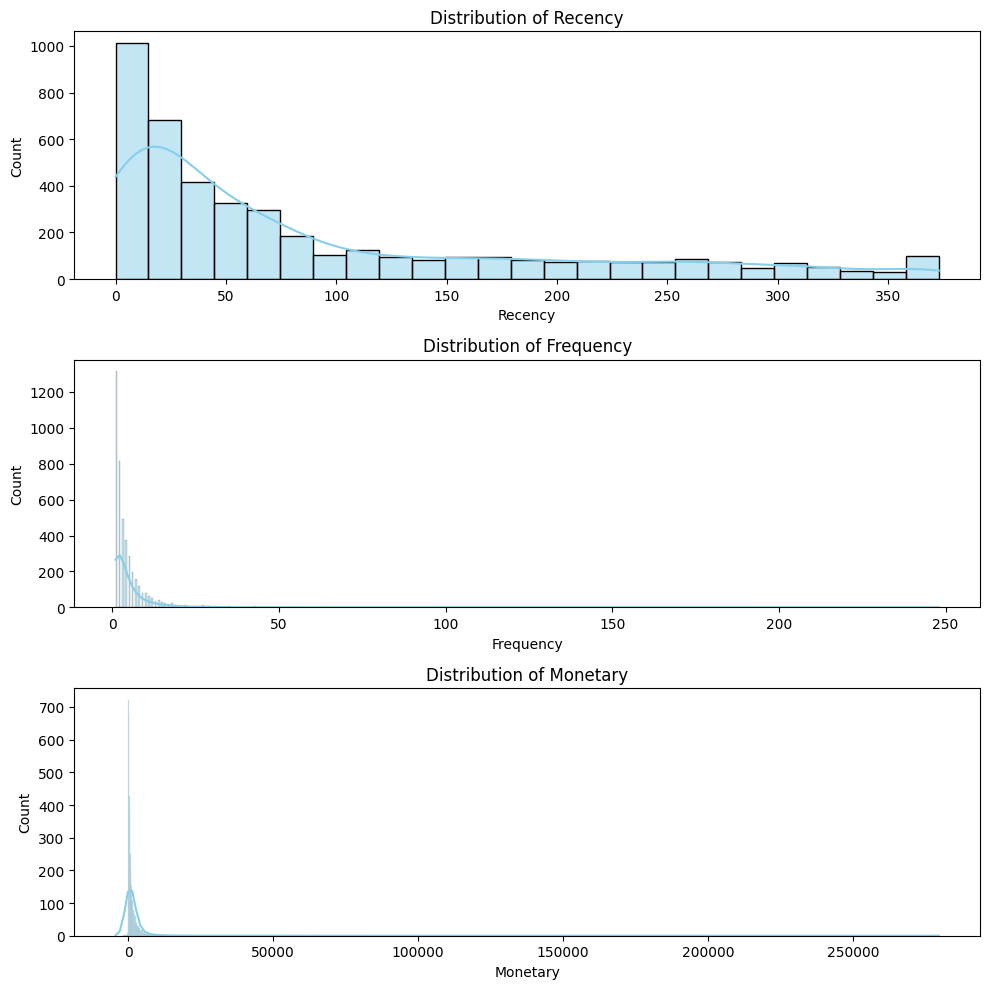

In [35]:
rfm_cols = ['Recency', 'Frequency', 'Monetary']

plt.figure(figsize=(10,10))

for i, col in enumerate(rfm_cols):
    plt.subplot(3, 1, i+1)
    sns.histplot(rfm[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


In [37]:
from sklearn.cluster import KMeans

# Use Elbow method / silhouette score to find optimal clusters (let's assume 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Add cluster labels
rfm['Cluster'] = kmeans.labels_

rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,2,0.00,1
1,12347.0,1,7,4310.00,3
2,12348.0,74,4,1797.24,3
3,12349.0,18,1,1757.55,3
4,12350.0,309,1,334.40,1


In [38]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,9.752577,28.510309,12168.264691
1,247.927577,1.805942,455.110716
2,4.090909,109.909091,124312.306364
3,41.780906,4.370550,1320.981506


In [39]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().sort_values('Monetary', ascending=False)

,Recency,Frequency,Monetary
Cluster,,,
2,4.090909,109.909091,124312.306364
0,9.752577,28.510309,12168.264691
3,41.780906,4.370550,1320.981506
1,247.927577,1.805942,455.110716


# cearte the featuring-labeling

In [40]:
cluster_labels = {
    0: 'High-Value Customers',
    1: 'Regular Customers',
    2: 'Occasional Shoppers',
    3: 'At-Risk Customers'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_labels)


In [41]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,325,2,0.00,1,Regular Customers
1,12347.0,1,7,4310.00,3,At-Risk Customers
2,12348.0,74,4,1797.24,3,At-Risk Customers
3,12349.0,18,1,1757.55,3,At-Risk Customers
4,12350.0,309,1,334.40,1,Regular Customers


In [42]:
rfm['Segment'].value_counts()

,count
Segment,
At-Risk Customers,3090
Regular Customers,1077
High-Value Customers,194
Occasional Shoppers,11


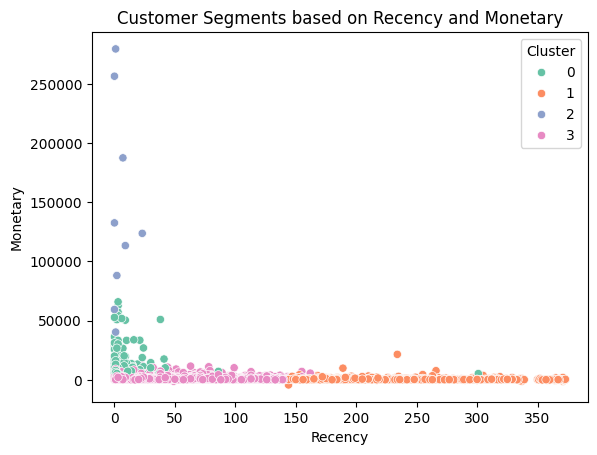

In [43]:
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set2')
plt.title("Customer Segments based on Recency and Monetary")
plt.show()

In [44]:
from sklearn.metrics import silhouette_score

silhouette_score(rfm_scaled, kmeans.labels_)

np.float64(0.6142804196098184)

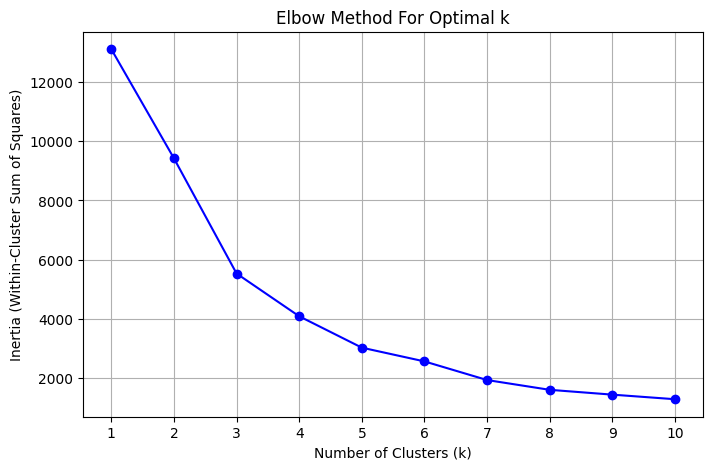

In [48]:
# Run KMeans for a range of cluster counts and record the inertia
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

In [49]:
selected_1=selected.groupby(['CustomerID','InvoiceDate']) ['Description'].unique().agg(list).reset_index()

/tmp/ipython-input-49-648031500.py:1: FutureWarning: using <class 'list'> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  selected_1=selected.groupby(['CustomerID','InvoiceDate']) ['Description'].unique().agg(list).reset_index()


In [50]:
selected_1

,CustomerID,InvoiceDate,Description
0,12346.0,2023-01-18 10:01:00,[MEDIUM CERAMIC TOP STORAGE JAR]
1,12346.0,2023-01-18 10:17:00,[MEDIUM CERAMIC TOP STORAGE JAR]
2,12347.0,2022-12-07 14:57:00,"[BLUE 3 PIECE POLKADOT CUTLERY SET, ALARM CLOC..."
3,12347.0,2023-01-26 14:30:00,"[PACK OF 60 SPACEBOY CAKE CASES, RED RETROSPOT..."
4,12347.0,2023-04-07 10:43:00,"[GIFT BAG PSYCHEDELIC APPLES, SMALL FOLDING SC..."
...,...,...,...
22029,18283.0,2023-11-30 12:59:00,"[LUNCH BAG SUKI DESIGN , LUNCH BAG PINK POLKAD..."
22030,18283.0,2023-12-06 12:02:00,"[STRAWBERRY SHOPPER BAG, RED RETROSPOT SHOPPER..."
22031,18287.0,2023-05-22 10:39:00,"[SET/4 SPRING FLOWER DECORATION, ICE CREAM PEN..."
22032,18287.0,2023-10-12 10:23:00,"[SET/6 FROG PRINCE T-LIGHT CANDLES, SET OF 2 C..."


# columns name change

In [51]:
selected_1=selected_1.rename(columns={'Description':'Product', 'InvoiceDate':'Date'})

In [52]:
selected_1

,CustomerID,Date,Product
0,12346.0,2023-01-18 10:01:00,[MEDIUM CERAMIC TOP STORAGE JAR]
1,12346.0,2023-01-18 10:17:00,[MEDIUM CERAMIC TOP STORAGE JAR]
2,12347.0,2022-12-07 14:57:00,"[BLUE 3 PIECE POLKADOT CUTLERY SET, ALARM CLOC..."
3,12347.0,2023-01-26 14:30:00,"[PACK OF 60 SPACEBOY CAKE CASES, RED RETROSPOT..."
4,12347.0,2023-04-07 10:43:00,"[GIFT BAG PSYCHEDELIC APPLES, SMALL FOLDING SC..."
...,...,...,...
22029,18283.0,2023-11-30 12:59:00,"[LUNCH BAG SUKI DESIGN , LUNCH BAG PINK POLKAD..."
22030,18283.0,2023-12-06 12:02:00,"[STRAWBERRY SHOPPER BAG, RED RETROSPOT SHOPPER..."
22031,18287.0,2023-05-22 10:39:00,"[SET/4 SPRING FLOWER DECORATION, ICE CREAM PEN..."
22032,18287.0,2023-10-12 10:23:00,"[SET/6 FROG PRINCE T-LIGHT CANDLES, SET OF 2 C..."


# EDA

In [53]:
selected_1['CustomerID'].value_counts().sort_values(ascending=False)

,count
CustomerID,
14911.0,248
12748.0,225
17841.0,168
14606.0,129
15311.0,118
...,...
18256.0,1
12357.0,1
18224.0,1


In [54]:
selected_1['CustomerID'].value_counts().sort_values(ascending=False).reset_index().groupby('count').agg({'CustomerID':'nunique'})

,CustomerID
count,
1,1314
2,818
3,490
4,378
5,291
...,...
118,1
129,1
168,1


In [55]:
selected_1[['Product', 'CustomerID', 'Date']].head(10)  # First 10 rows

,Product,CustomerID,Date
0,[MEDIUM CERAMIC TOP STORAGE JAR],12346.0,2023-01-18 10:01:00
1,[MEDIUM CERAMIC TOP STORAGE JAR],12346.0,2023-01-18 10:17:00
2,"[BLUE 3 PIECE POLKADOT CUTLERY SET, ALARM CLOC...",12347.0,2022-12-07 14:57:00
3,"[PACK OF 60 SPACEBOY CAKE CASES, RED RETROSPOT...",12347.0,2023-01-26 14:30:00
4,"[GIFT BAG PSYCHEDELIC APPLES, SMALL FOLDING SC...",12347.0,2023-04-07 10:43:00
5,"[AIRLINE BAG VINTAGE JET SET BROWN, ALARM CLOC...",12347.0,2023-06-09 13:01:00
6,"[RED REFECTORY CLOCK , TEA TIME OVEN GLOVE, 72...",12347.0,2023-08-02 08:48:00
7,"[ROSES REGENCY TEACUP AND SAUCER , PANTRY HOOK...",12347.0,2023-10-31 12:25:00
8,"[WOODLAND CHARLOTTE BAG, MINI PLAYING CARDS DO...",12347.0,2023-12-07 15:52:00
9,"[SET OF 72 SKULL PAPER DOILIES, POSTAGE, PACK...",12348.0,2022-12-16 19:09:00


In [56]:
# Define unwanted product names
unwanted = ['[Manual]', '[Discount]']

# Remove rows where 'Product' is in that list
selcted_1 = selected_1[~selected_1['Product'].isin(unwanted)]


In [57]:
selected_1['Product'].value_counts().head(20).sort_values(ascending=False).reset_index()

,Product,count
0,[Manual],185
1,[POSTAGE],118
2,[REGENCY CAKESTAND 3 TIER],68
3,[Discount],64
4,[JAM MAKING SET WITH JARS],33
5,[RABBIT NIGHT LIGHT],32
6,[CHILLI LIGHTS],29
7,[WHITE HANGING HEART T-LIGHT HOLDER],25
8,[SET OF 3 CAKE TINS PANTRY DESIGN ],23
9,[CLASSIC GLASS COOKIE JAR],20


In [58]:
selected_1['Date'].value_counts().sort_values(ascending=False).reset_index()

,Date,count
0,2023-10-26 12:28:00,4
1,2023-11-10 14:28:00,4
2,2023-11-02 12:04:00,3
3,2022-12-15 14:25:00,3
4,2023-11-23 13:27:00,3
...,...,...
20455,2022-12-16 11:11:00,1
20456,2023-03-28 12:13:00,1
20457,2023-06-10 15:07:00,1
20458,2023-05-25 15:54:00,1


# chart

In [59]:
selected_1['Product'].value_counts().head(20).sort_values(ascending=False).reset_index()

,Product,count
0,[Manual],185
1,[POSTAGE],118
2,[REGENCY CAKESTAND 3 TIER],68
3,[Discount],64
4,[JAM MAKING SET WITH JARS],33
5,[RABBIT NIGHT LIGHT],32
6,[CHILLI LIGHTS],29
7,[WHITE HANGING HEART T-LIGHT HOLDER],25
8,[SET OF 3 CAKE TINS PANTRY DESIGN ],23
9,[CLASSIC GLASS COOKIE JAR],20


/tmp/ipython-input-60-2077955279.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dates, x='Date', y='count', palette='viridis')


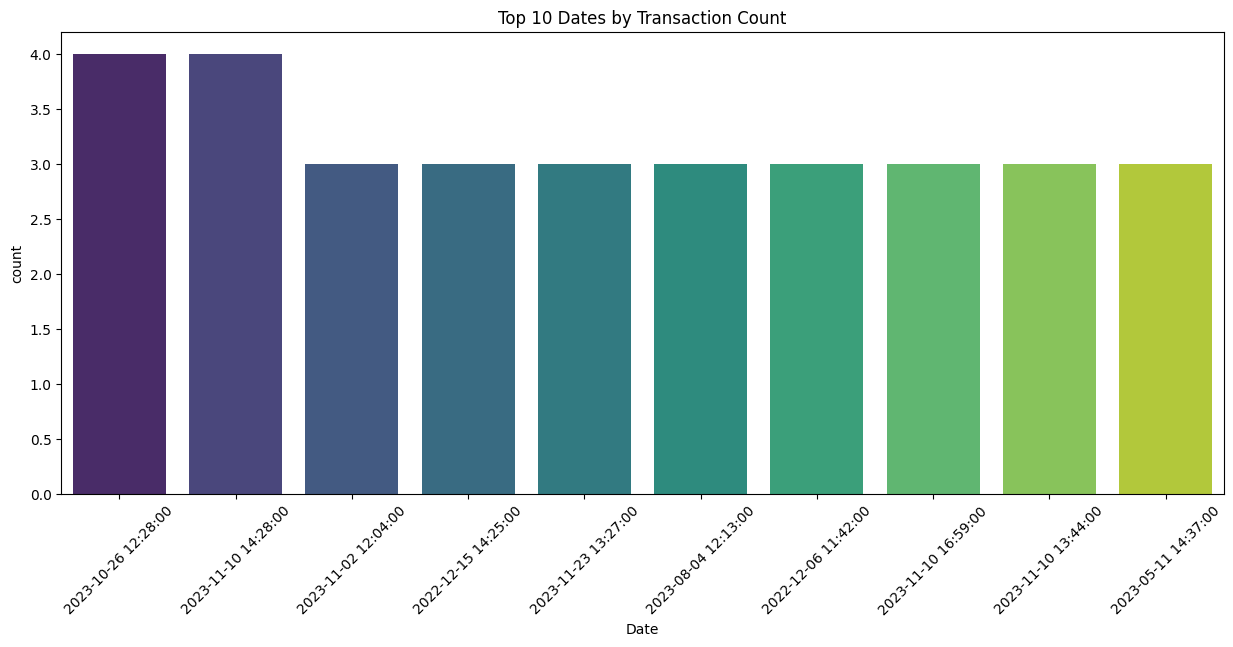

In [60]:
top_dates = selected_1['Date'].value_counts().sort_values(ascending=False).head(10).reset_index()
top_dates.columns = ['Date', 'count']


plt.figure(figsize=(15,6))
sns.barplot(data=top_dates, x='Date', y='count', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Dates by Transaction Count')
plt.show()


In [61]:
selected_1['Date'].dt.day_name()

,Date
0,Wednesday
1,Wednesday
2,Wednesday
3,Thursday
4,Friday
...,...
22029,Thursday
22030,Wednesday
22031,Monday
22032,Thursday


In [62]:
selected_1['Date'].dt.day_name().value_counts()

,count
Date,
Friday,4946
Thursday,4074
Wednesday,3867
Tuesday,3472
Saturday,3337
Monday,2338


#Data Transform

In [63]:
all_pro = [item for sublist in selcted_1['Product'] for item in sublist]
top_20_pro = pd.Series(all_pro).value_counts().head(20).index.tolist()

In [64]:
filtered_transactions = selcted_1['Product'].apply(lambda x: [item for item in x if item in top_20_pro])

In [65]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(filtered_transactions).transform(filtered_transactions)

In [66]:
processed_data = pd.DataFrame(te_ary, columns=te.columns_)

In [67]:
te.columns_

['ALARM CLOCK BAKELIKE RED ',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'HEART OF WICKER SMALL',
 'JAM MAKING SET WITH JARS',
 'JUMBO BAG RED RETROSPOT',
 'LUNCH BAG  BLACK SKULL.',
 'LUNCH BAG CARS BLUE',
 'LUNCH BAG PINK POLKADOT',
 'LUNCH BAG RED RETROSPOT',
 'LUNCH BAG SPACEBOY DESIGN ',
 'LUNCH BAG SUKI DESIGN ',
 'NATURAL SLATE HEART CHALKBOARD ',
 'PACK OF 72 RETROSPOT CAKE CASES',
 "PAPER CHAIN KIT 50'S CHRISTMAS ",
 'PARTY BUNTING',
 'POSTAGE',
 'REGENCY CAKESTAND 3 TIER',
 'SET OF 3 CAKE TINS PANTRY DESIGN ',
 'SPOTTY BUNTING',
 'WHITE HANGING HEART T-LIGHT HOLDER']

In [68]:
te.encoder=te_ary

In [69]:
te.encoder

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [70]:
processed_data=pd.DataFrame(te.encoder, columns=te.columns_)

In [71]:
processed_data

,ALARM CLOCK BAKELIKE RED,ASSORTED COLOUR BIRD ORNAMENT,HEART OF WICKER SMALL,JAM MAKING SET WITH JARS,JUMBO BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,LUNCH BAG CARS BLUE,LUNCH BAG PINK POLKADOT,LUNCH BAG RED RETROSPOT,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG SUKI DESIGN,NATURAL SLATE HEART CHALKBOARD,PACK OF 72 RETROSPOT CAKE CASES,PAPER CHAIN KIT 50'S CHRISTMAS,PARTY BUNTING,POSTAGE,REGENCY CAKESTAND 3 TIER,SET OF 3 CAKE TINS PANTRY DESIGN,SPOTTY BUNTING,WHITE HANGING HEART T-LIGHT HOLDER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22029,False,False,False,False,True,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False
22030,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False
22031,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22032,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
processed_data.astype(int)

,ALARM CLOCK BAKELIKE RED,ASSORTED COLOUR BIRD ORNAMENT,HEART OF WICKER SMALL,JAM MAKING SET WITH JARS,JUMBO BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,LUNCH BAG CARS BLUE,LUNCH BAG PINK POLKADOT,LUNCH BAG RED RETROSPOT,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG SUKI DESIGN,NATURAL SLATE HEART CHALKBOARD,PACK OF 72 RETROSPOT CAKE CASES,PAPER CHAIN KIT 50'S CHRISTMAS,PARTY BUNTING,POSTAGE,REGENCY CAKESTAND 3 TIER,SET OF 3 CAKE TINS PANTRY DESIGN,SPOTTY BUNTING,WHITE HANGING HEART T-LIGHT HOLDER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22029,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0
22030,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0
22031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# correlation

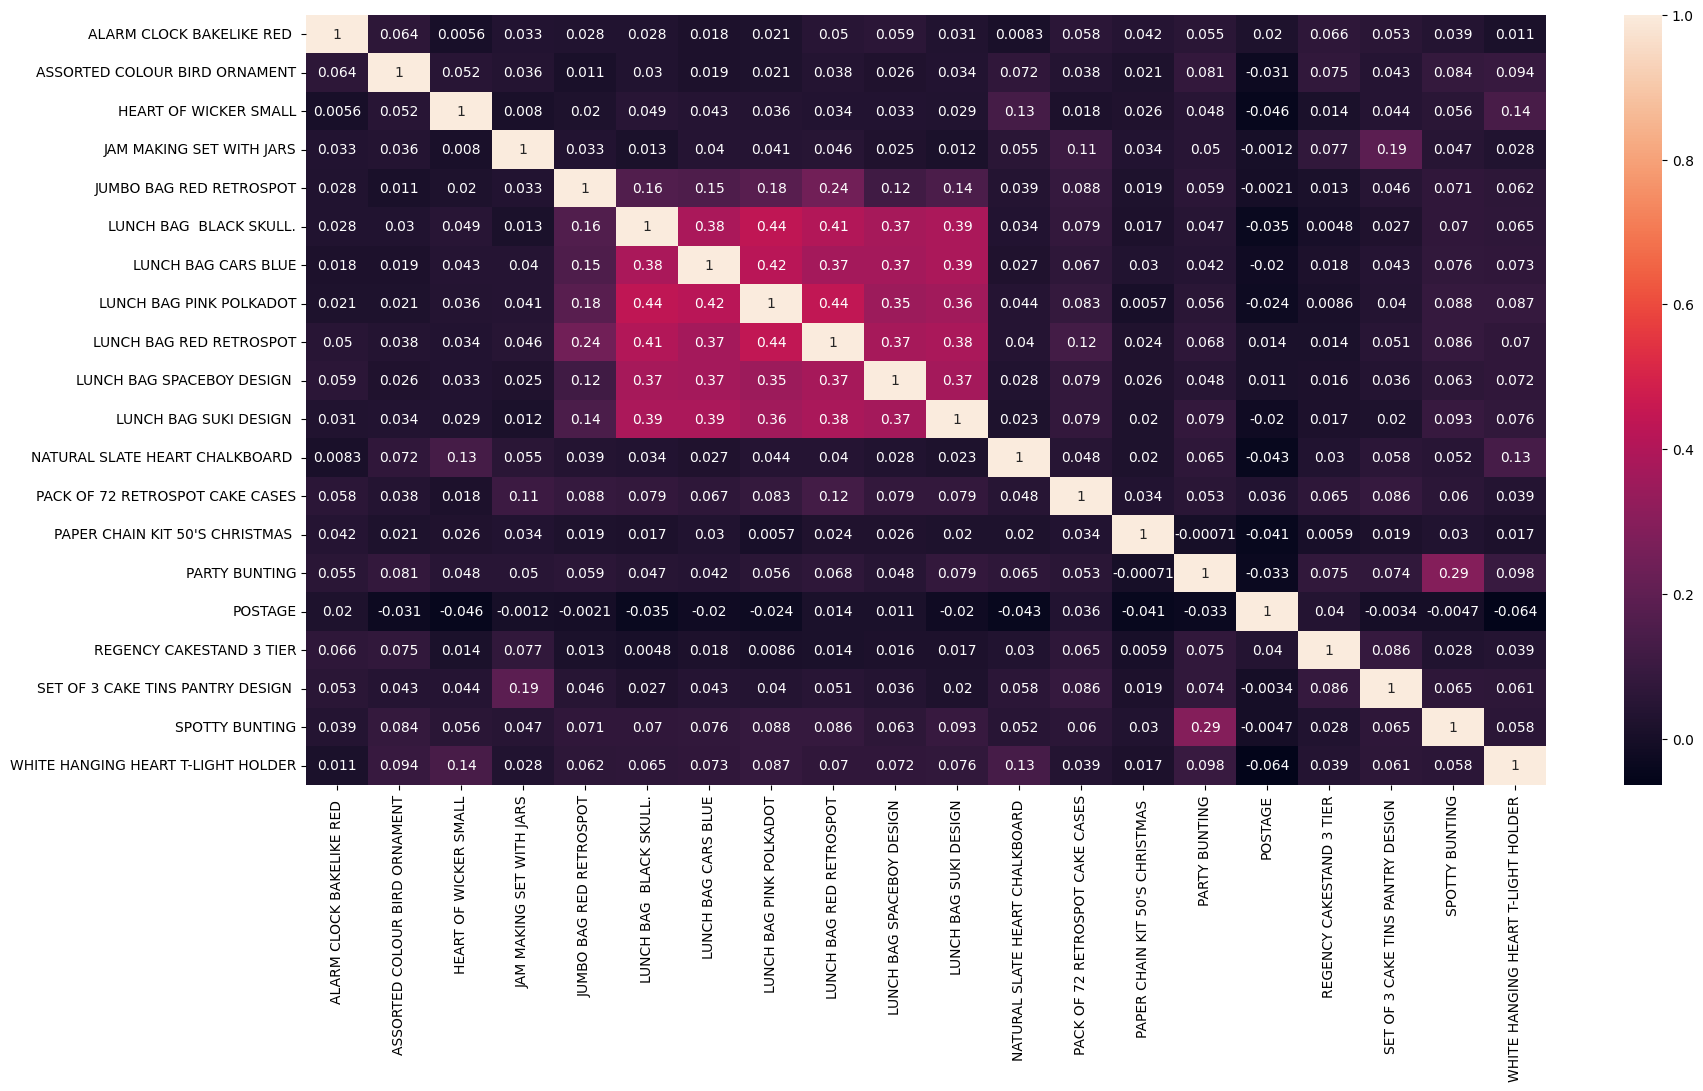

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(processed_data.corr(), annot=True)
plt.show()

In [74]:
# more then 50%

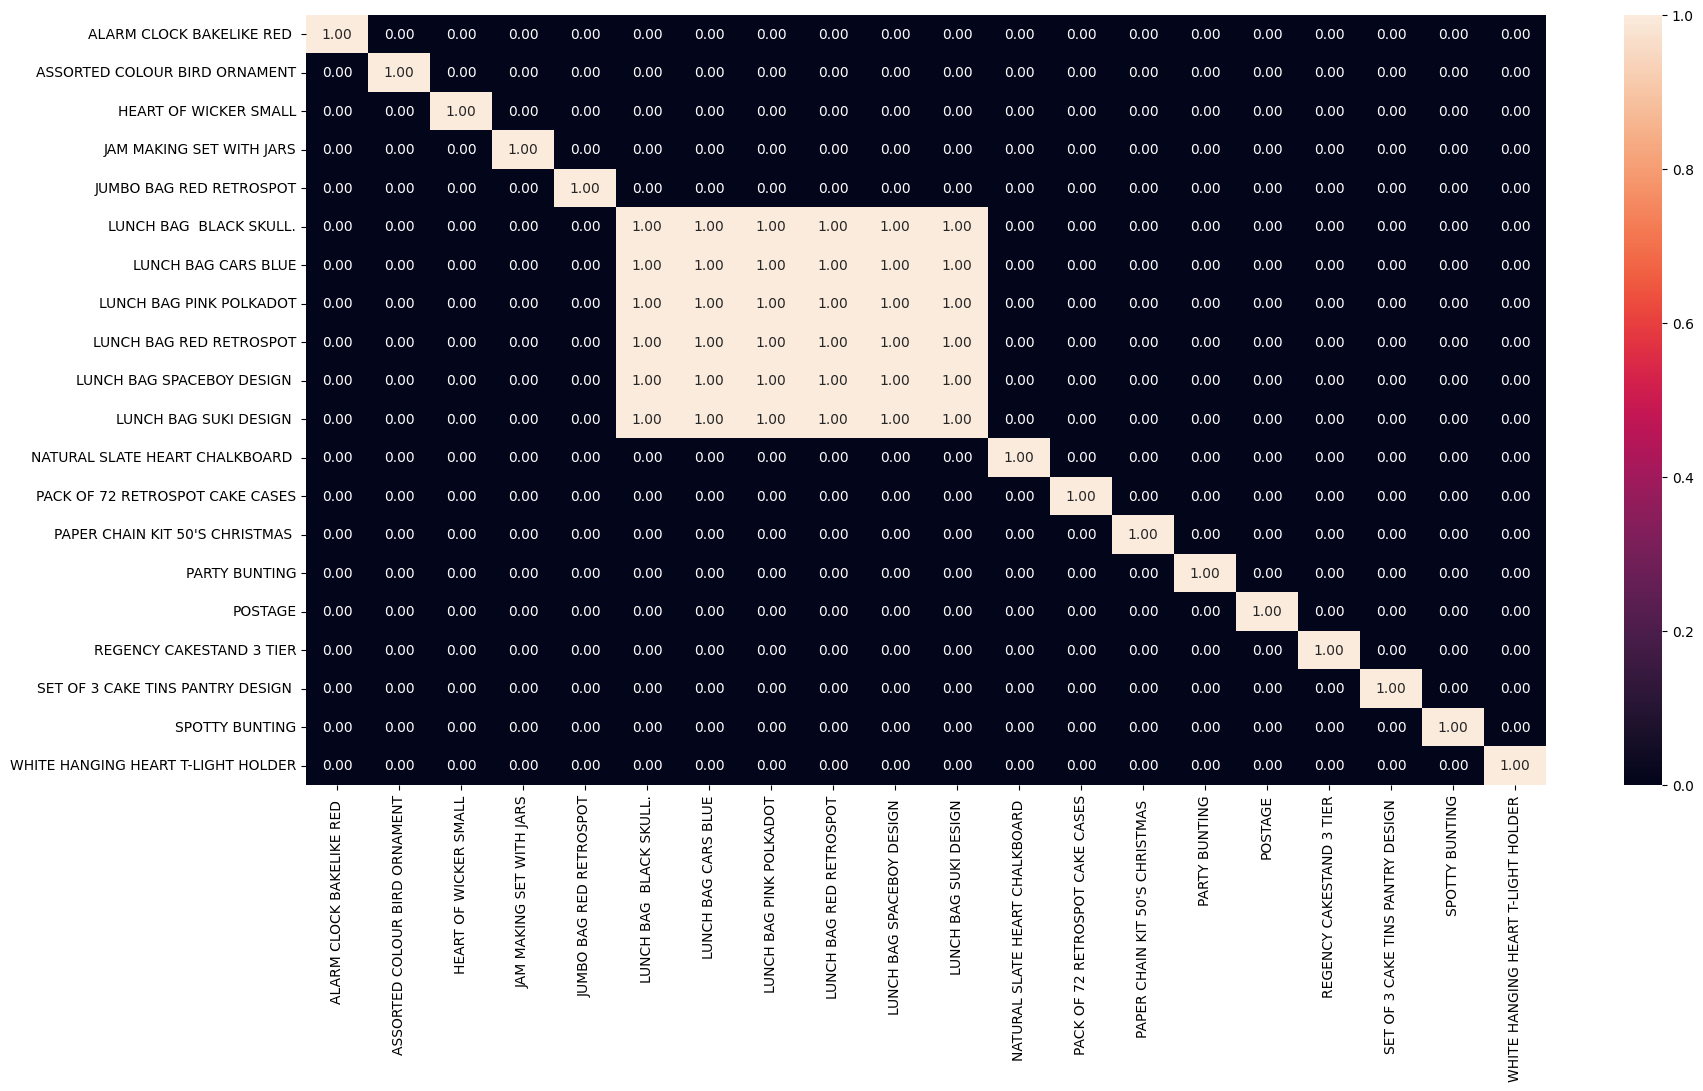

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(abs(processed_data.corr())>0.3, annot=True,fmt='.2f')
plt.show()

# Association Rule mining

In [76]:
processed_data.head()

,ALARM CLOCK BAKELIKE RED,ASSORTED COLOUR BIRD ORNAMENT,HEART OF WICKER SMALL,JAM MAKING SET WITH JARS,JUMBO BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.,LUNCH BAG CARS BLUE,LUNCH BAG PINK POLKADOT,LUNCH BAG RED RETROSPOT,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG SUKI DESIGN,NATURAL SLATE HEART CHALKBOARD,PACK OF 72 RETROSPOT CAKE CASES,PAPER CHAIN KIT 50'S CHRISTMAS,PARTY BUNTING,POSTAGE,REGENCY CAKESTAND 3 TIER,SET OF 3 CAKE TINS PANTRY DESIGN,SPOTTY BUNTING,WHITE HANGING HEART T-LIGHT HOLDER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [77]:
# Apriori

In [78]:
ap = apriori(processed_data, min_support=0.03, use_colnames=True)


In [79]:
print(ap.shape)

(20, 2)


In [80]:
ap.sort_values(by='support', ascending=False)

,support,itemsets
19,0.091359,(WHITE HANGING HEART T-LIGHT HOLDER)
16,0.085413,(REGENCY CAKESTAND 3 TIER)
4,0.074476,(JUMBO BAG RED RETROSPOT)
14,0.063493,(PARTY BUNTING)
1,0.062857,(ASSORTED COLOUR BIRD ORNAMENT)
8,0.060316,(LUNCH BAG RED RETROSPOT)
17,0.055233,(SET OF 3 CAKE TINS PANTRY DESIGN )
15,0.054098,(POSTAGE)
5,0.048697,(LUNCH BAG BLACK SKULL.)
12,0.047245,(PACK OF 72 RETROSPOT CAKE CASES)


In [81]:
association_rules(ap)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


# FP Growth

In [82]:
fp=fpgrowth(processed_data, min_support=0.03, use_colnames=True)

In [83]:
fp.sort_values(by='support', ascending=False)

,support,itemsets
14,0.091359,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.085413,(REGENCY CAKESTAND 3 TIER)
10,0.074476,(JUMBO BAG RED RETROSPOT)
9,0.063493,(PARTY BUNTING)
15,0.062857,(ASSORTED COLOUR BIRD ORNAMENT)
6,0.060316,(LUNCH BAG RED RETROSPOT)
3,0.055233,(SET OF 3 CAKE TINS PANTRY DESIGN )
2,0.054098,(POSTAGE)
16,0.048697,(LUNCH BAG BLACK SKULL.)
8,0.047245,(PACK OF 72 RETROSPOT CAKE CASES)


In [84]:
fp

,support,itemsets
0,0.041164,(ALARM CLOCK BAKELIKE RED )
1,0.085413,(REGENCY CAKESTAND 3 TIER)
2,0.054098,(POSTAGE)
3,0.055233,(SET OF 3 CAKE TINS PANTRY DESIGN )
4,0.043796,(JAM MAKING SET WITH JARS)
5,0.046065,(SPOTTY BUNTING)
6,0.060316,(LUNCH BAG RED RETROSPOT)
7,0.043161,(LUNCH BAG PINK POLKADOT)
8,0.047245,(PACK OF 72 RETROSPOT CAKE CASES)
9,0.063493,(PARTY BUNTING)


# Save the model

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
kmeans_m = pd.DataFrame(rfm)
kmeans_m.to_csv("/content/drive/MyDrive/Colab Notebooks/recom_model_rfm.csv", index=False)

In [87]:
with open("/content/drive/MyDrive/Colab Notebooks/recommender_model_rfm.pkl", "wb") as f:
     pickle.dump(kmeans, f)
with open('/content/drive/MyDrive/Colab Notebooks/recommender_rfm_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [88]:
# # load
with open("/content/drive/MyDrive/Colab Notebooks/recommender_model_rfm.pkl", "rb") as f:
     model = pickle.load(f)

✅ Step 1: Create Item-User Matrix

In [89]:
import pandas as pd

# Create a pivot table: rows=product, columns=customer, values=quantity purchased
item_user_matrix = data.pivot_table(index='Description',
                                    columns='CustomerID',
                                    values='Quantity',
                                    aggfunc='sum')

# Fill NaN with 0
item_user_matrix.fillna(0, inplace=True)

✅ Step 2: Compute Cosine Similarity Between Items

In [90]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between products (item-item similarity)
item_similarity = pd.DataFrame(cosine_similarity(item_user_matrix),
                                index=item_user_matrix.index,
                                columns=item_user_matrix.index)

In [91]:
def recommend_products(product_name, n=5):
    if product_name not in item_similarity.columns:
        return "Product not found in the catalog."

    # Sort products by similarity score descending
    similar_products = item_similarity[product_name].sort_values(ascending=False)

    # Exclude the input product itself
    recommended_products = similar_products.iloc[1:n+1].index.tolist()

    return recommended_products

In [92]:
recommend_products('WHITE HANGING HEART T-LIGHT HOLDER', 5)

['RED HANGING HEART T-LIGHT HOLDER',
 'WASHROOM METAL SIGN',
 'LAUNDRY 15C METAL SIGN',
 'GREEN VINTAGE SPOT BEAKER',
 'BLUE VINTAGE SPOT BEAKER']

In [93]:
item_similarity.to_csv('/content/drive/MyDrive/Colab Notebooks/item_similarity.csv')

# Streamlit web visual

In [94]:
!pip install streamlit streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [105]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from streamlit_option_menu import option_menu

# Load models
with open('/content/drive/MyDrive/Colab Notebooks/recommender_model_rfm.pkl', 'rb') as f:
    kmeans_model = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/recommender_rfm_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)


kmeans = KMeans(n_clusters=4, random_state=42)



with st.sidebar:
    selected = option_menu(
        menu_title="Home",
        options=["Clustering", "Recommendation"],
        icons=["calendar", "calendar3"],
        menu_icon="cast",
        default_index=0
    )

if selected == "Clustering":
        st.title("Customer Segmentation")

        recency = st.number_input("Recency (days since last purchase)", min_value=0)
        frequency = st.number_input("Frequency (number of purchases)", min_value=0)
        monetary = st.number_input("Monetary (total spend)", min_value=0.0)
        cluster_labels = {
                0: 'High-Value Customer',
                1: 'Regular Customer',
                2: 'Occasional Shopper',
                3: 'At-Risk Customer'
                  }

        if st.button("Predict Segment"):
            user_scaled = scaler.transform([[recency, frequency, monetary]])
            cluster_number = kmeans_model.predict(user_scaled)[0]
            # Map to label
            cluster_name = cluster_labels[cluster_number]

            st.write(f"This customer belongs to: {cluster_name}")

elif selected == "Recommendation":
    item_similarity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/item_similarity.csv', index_col=0)
    st.title("Product Recommender")

    product_name = st.text_input("Enter Product Name")

    if st.button("Recommend"):
        if product_name not in item_similarity.columns:
            st.write("Product not found.")
        else:
            recommendations = item_similarity[product_name].sort_values(ascending=False)[1:6].index.tolist()
            st.write("Recommended Products:")
            for i in recommendations:
                st.write(i)



Overwriting app.py


In [106]:
!wget -q -O - ipv4.icanhazip.com

104.196.206.34


In [107]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.206.34:8501

⠼⠴⠦⠧⠇⠏⠋your url is: https://silly-carrots-say.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
  Stopping...
^C
